In [45]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [36]:
sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread('/Users/pd/PycharmProjects/MA_Labs/Images/bookshelf.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [37]:
# help(cv2.xfeatures2d.SIFT_create())

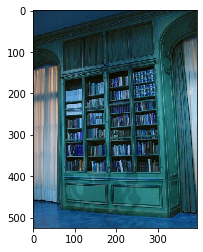

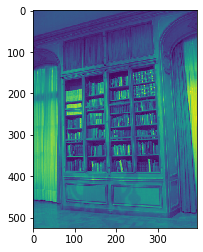

In [39]:
plt.imshow(image)
plt.show()
plt.imshow(gray)

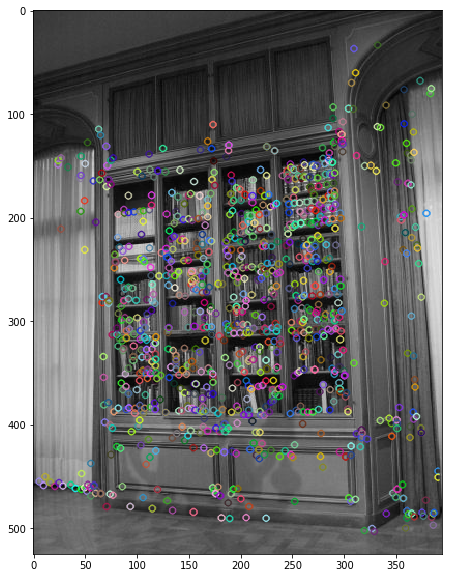

In [60]:
kp = sift.detect(gray, None)
# flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
im_k = cv2.drawKeypoints(gray, kp, image)

plt.figure(figsize=(20,10))
plt.imshow(im_k, cmap='gray')
plt.show()

In [61]:
# Keypoints are spatial locations, or points in the image that define what is interesting or what stand out 
# in the image.
# The reason why keypoints are special is because no matter how the image changes, whether the image rotates, 
# shrinks/expands, is translated (all of these would be an affine transformation by the way) 
# or is subject to distortion (i.e. a projective transformation or homography), you should be able to 
# find the same keypoints in this modified image when comparing with the original image.

# Descriptors are primarily concerned with both the scale and the orientation of the keypoint. The 
# keypoints we've nailed that concept down, but we need the descriptor part if it is our purpose to 
# try and match between keypoints in different images.

# some of these points have a different circle radius. These deal with scale. How interest points work 
# in a general sense is that we decompose the image into multiple scales. We check for interest points 
# at each scale, and we combine all of these interest points together to create the final output. 
# The larger the "circle", the larger the scale was that the point was detected at. Also, there is a 
# line that radiates from the centre of the circle to the edge. This is the orientation of the keypoint.

In [66]:
im1 = cv2.imread("/Users/pd/PycharmProjects/MA_Labs/Images/nieuwekerk1.jpg")
im2 = cv2.imread("/Users/pd/PycharmProjects/MA_Labs/Images/nieuwekerk2.jpg")

# gr1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
# gr2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

kp1, des1 = sift.detectAndCompute(im1, None)
kp2, des2 = sift.detectAndCompute(im2, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

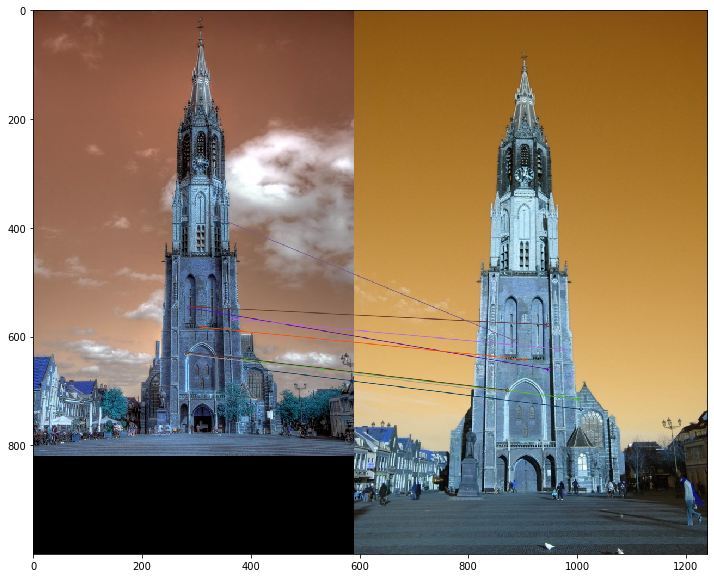

In [70]:
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

im3 = cv2.drawMatches(im1,kp1,im2,kp2,matches[:10], None, flags=2)

plt.figure(figsize=(20,10))
plt.imshow(im3)

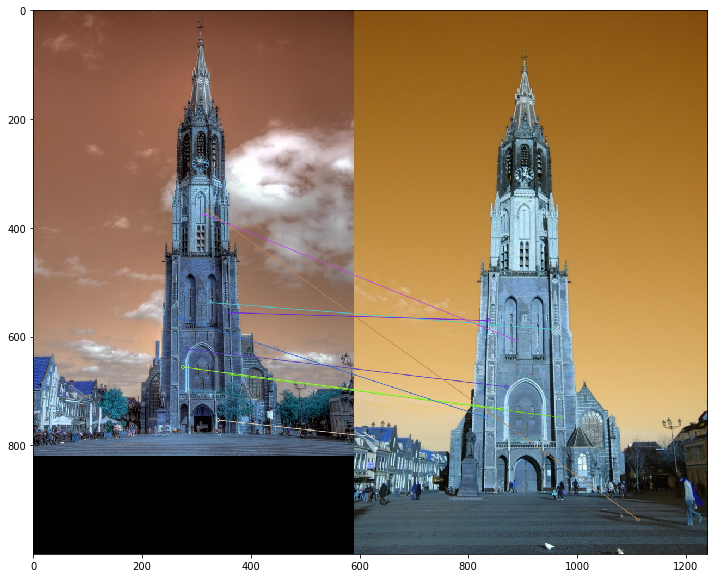

In [71]:
im3 = cv2.drawMatches(im1,kp1,im2,kp2,matches[10:19], None, flags=2)

plt.figure(figsize=(20,10))
plt.imshow(im3)